# Curving the grades using different methods

Curving is common in college to bump up the grades for every student in an exam or a class. Curving makes everyone's grade higher while the curved grades are still useful for differentiating good against bad performance. It is especially necessary when the exams are designed to be harder than it should. 

For example, a test was designed so hard that all the grades are within [30, 70]. The instructor felt guilty (which is not rare by the way) and decides to add 20 to every student directly. As a consequence the grades will be bumped to [50, 90]. 

This is just a simple method to show how the process works. The method has several obvious limitations. First, if a grade is higher than 80, it ends up higher than 100. Second, if a student did not take the test, he/she would still have a 20 after the adjustment. In real practice, several simple methods are available for this approach. The following snippet shows how it's done.

In [100]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

A very popular method is to use 10 multiplies the square root of the original grade. Let's call it **sqrt10**.

$G_{curved} = 10 \times \sqrt{G}$

So an original grade of 36 ends up being $10 \times \sqrt{36} = 60$. Any grade higher than 36 ends up greater than 60. What is even better, is that after curving, 0 would still be 0 and 100 would still be 100.

Three properties make this a popular choice:
* The function is monotonically increasing
* It's a concave function
* The scale remains the same! (any grade within [0, 100] ends up still within[0, 100])

There is another method that is even more "powerful":

$G_{curved} = 50 \times \log_{10}(G)$

This function also satisifies the three properties, and with this new function, a 16 becomes 60 after curving!

Mathematically, the above two functions are doing the same thing, which is to map an interval monotonically to itself. A widely used function is the [Gamma Correction](https://en.wikipedia.org/wiki/Gamma_correction). Consider $f(x) = x^{\gamma}, x \in (0, 1)$ for any $\gamma$, $f(0) = 0$ and $f(1)=1$. We can use different values of $\gamma$ to change the shape of the curve. Obviously we need to convert the grades $G \in (0,100)$ to the (0,100). But this is easy. Eventually, the $G \in (0, 100)$ will be mapped to $G_{curved} \in (0, 100)$:

$\frac{G_{curved}}{100} = ({\frac{G}{100}})^{\gamma}$

You will notice that when $\gamma = 1/2$, the form of the equation is the same as the **sqrt10**! In fact, the 1/2 was often used as the default value for convenience purposes.

So the following function (written in `Python 3.6`) curves the grades with an choice of methods in `sqrt10`, `log50`, and `gamma`.

In [101]:
def curve(grades, method='sqrt10', gamma=1.):
    import numpy as np
    """[This function is used to curve the grades]
    
    Arguments:
        grades {[array-like]} -- [the original grades that need to be curved]
    
    Keyword Arguments:
        method {str} -- [method for curving] (default: {'sqrt10'})
        gamma {[float] between 0.0 and 1.0} -- [a necessary value for method 'gamma'] (default: {1.})
    
    Returns:
        [curved] -- [grades after curving]
    """

    if method == 'sqrt10':
        curved = np.sqrt(grades) * 10
    elif method == 'log50':
        curved = np.log10(grades) * 50
    elif method == 'gamma':
        curved = 100 * np.power(grades/100, gamma)
    else:
        print('invalid function')
        curved = grades
    return curved

Let's visualize the curved grades with the original grades to see how different algorithms adjust the grades.

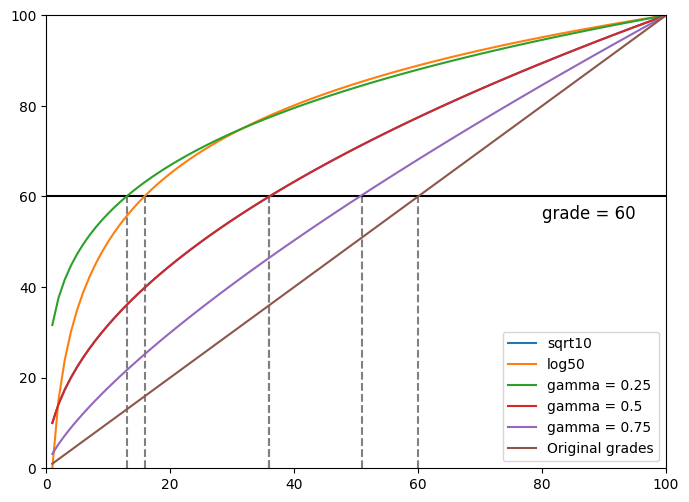

In [102]:
grades = np.linspace(1, 100, 100)

plt.figure(figsize=(8,6), dpi=100)
for method in ['sqrt10', 'log50', 'gamma']:
    if method in ['sqrt10', 'log50']:
        curved = curve(grades, method)
        mlabel = str(method)
        
        intersect = grades[np.argmin(np.abs(curved - 60))]
        plt.vlines(ymin=0, ymax=60, x=intersect, colors='gray', linestyles='--')
        plt.plot(grades, curved, label=mlabel)
        
    elif method in ['gamma']:
        for gamma in [0.25, 0.5, 0.75]:
            curved = curve(grades, method, gamma=gamma)
            mlabel=str(method)+' = '+str(gamma)
            
            intersect = grades[np.argmin(np.abs(curved - 60))]
            plt.vlines(ymin=0, ymax=60, x=intersect, colors='gray', linestyles='--')
            plt.plot(grades, curved, label=mlabel)

plt.plot(grades, grades, label = 'Original grades')
plt.hlines(xmin=0, xmax=100, y=60)
plt.text(x=80, y=55, s='grade = 60', fontsize=12)
plt.vlines(ymin=0, ymax=60, x=60, colors='gray', linestyles='--')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.show()

The brown line represents the original grade, and you can see that a smaller gamma is more agressive compared to larger gamma values. In other words, smaller gamma values benefit students more than larger ones. The results of the `sqrt10` is invisible since it overlaps with the `gamma = 0.5`.